## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegirid")
plt.rCParams["figure.figsize"] = (10,6)

In [43]:
import pandas as pd

df = pd.read_excel("job_market_data.xlsx")
df.head()

,job_title,company,location,skills,experience,posted_date,source
0,Reporting Analyst,Flipkart,Pune,"Azure, AWS, Power BI",0-1 years,2025-08-11,Naukri
1,Data Analyst â€“ Fresher,Infosys,Bangalore,"Power BI, Python, AWS",0-1 years,2026-01-01,Naukri
2,Data Analyst,Cognizant,Pune,"Excel, Python, SQL, AWS",0-1 years,2026-01-19,LinkedIn
3,Reporting Analyst,EY,Gurgaon,"Power BI, SQL, Pandas, NumPy, AWS",Junior,2025-08-21,Naukri
4,Reporting Analyst,Wipro,Chennai,"Power BI, Tableau, Azure",0-1,2025-08-10,Naukri


In [ ]:
# Dataset basic information
df.info()

In [ ]:
print("Rows and Columns:", df.shape)
print("\nColumn Names:")
df.columns

## Check Missing Values keyboardarrowdown (Data Cleaning)

In [ ]:
# Check missing values
df.isnull().sum()

In [ ]:
# Drop missing values if any
df = df.dropna()


In [ ]:
# Confirm cleaning
df.isnull().sum()

## Job Title Analysis

In [ ]:
df['job_title'].value_counts()

## 📊 Bar Chart – Job Title Distribution


In [ ]:
import matplotlib.pyplot as plt

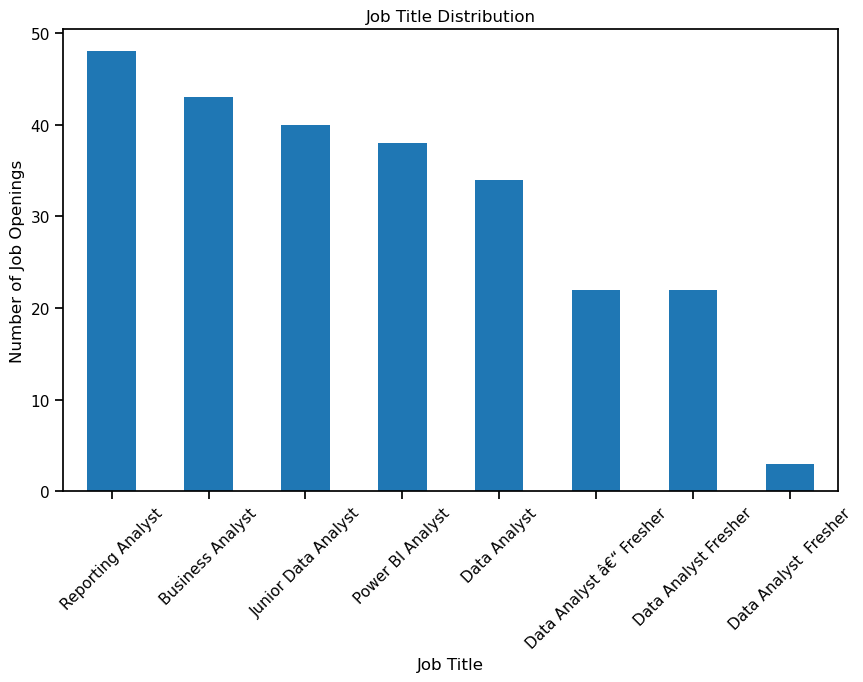

In [44]:
plt.figure(figsize=(10,6))
df['job_title'].value_counts().plot(kind='bar')
plt.title("Job Title Distribution")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Openings")
plt.xticks(rotation=45)
plt.show()

## Location-wise Job Demand

## 📊 Seaborn Count Plot

## Company-wise Hiring

In [ ]:
import seaborn as sns

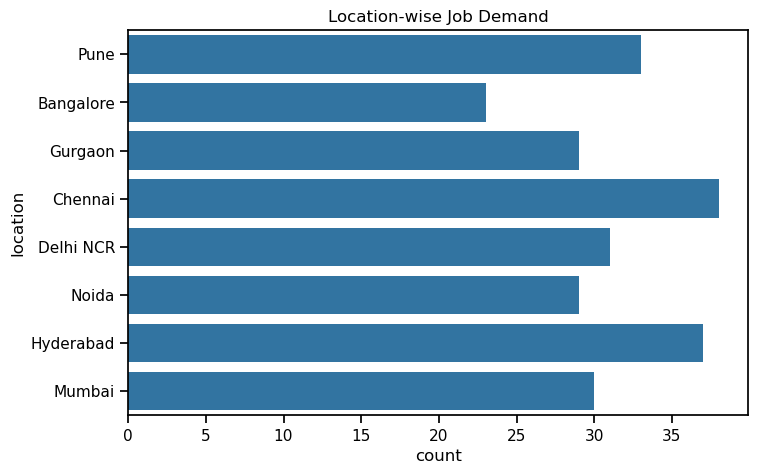

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(y='location', data=df)
plt.title("Location-wise Job Demand")
plt.show()

In [ ]:
df['company'].value_counts().head(10)

## 📊 Top Hiring Companies


# Experience Requirement keyboardarrowdown Analysis

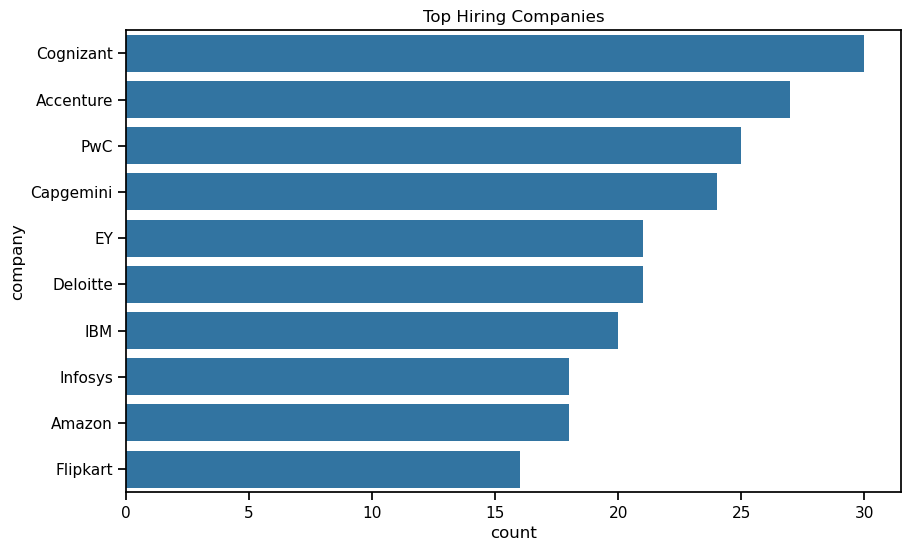

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(
y='company',
data=df,
order=df['company'].value_counts().index[:10]
)
plt.title("Top Hiring Companies")
plt.show()

In [ ]:
df['experience'].value_counts()

## 📊 Experience Level Chart

()

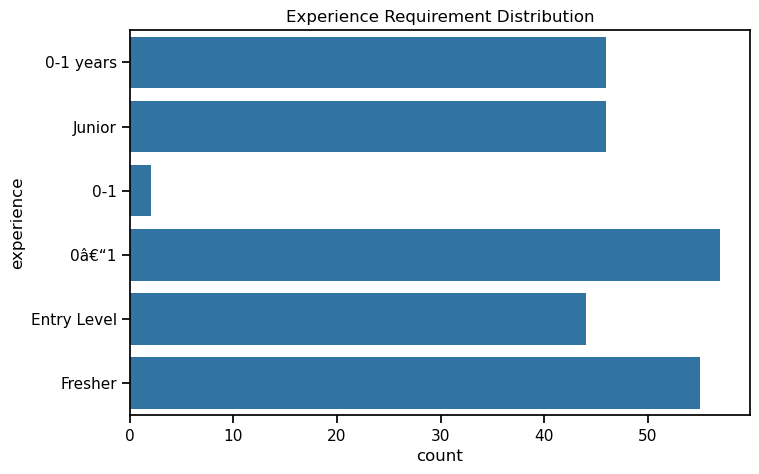

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(y='experience',data=df)
plt.title("Experience Requirement Distribution")
plt.show
()

## Skills Demand Analysis

In [50]:
df['skills'].value_counts().head(10)

skills
Pandas, Python, Power BI                2
Power BI, Azure, NumPy                  2
AWS, Power BI, Tableau                  2
AWS, Python, Tableau, Pandas            2
Tableau, Excel, Power BI, NumPy, AWS    2
SQL, Azure, Excel                       2
Pandas, Excel, SQL, AWS                 2
Pandas, Excel, AWS                      2
Python, Excel, Pandas, Tableau          2
SQL, Pandas, Python                     2
Name: count, dtype: int64

## 📊 Skills Demand Chart

## Count top skills

In [48]:
skills_series = df['skills'].str.split(', ')

all_skills = (
    skills_series
    .explode()
    .str.strip()
    .str.title()
)

top_skills = all_skills.value_counts().head(10)
top_skills

skills
Sql         126
Tableau     117
Aws         114
Power Bi    114
Azure       111
Excel       111
Numpy       110
Python      101
Pandas       98
Name: count, dtype: int64

## 📊 CLEAN & BEAUTIFUL SKILLS DEMAND CHART

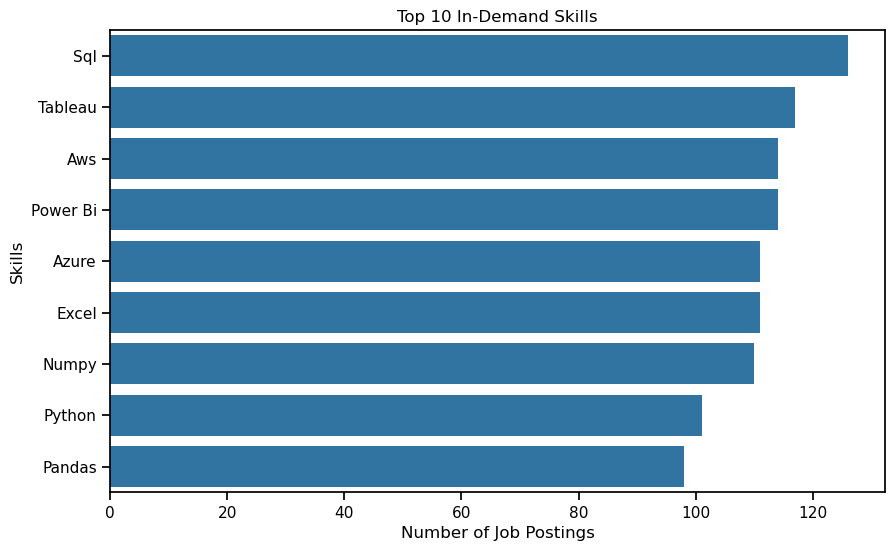

In [49]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x=top_skills.values,
    y=top_skills.index
)

plt.title("Top 10 In-Demand Skills")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skills")

plt.show()

## Job Source Analysis

In [51]:
df['source'].value_counts()

source
Naukri      88
Indeed      83
LinkedIn    79
Name: count, dtype: int64

## 📊 Job Source Chart

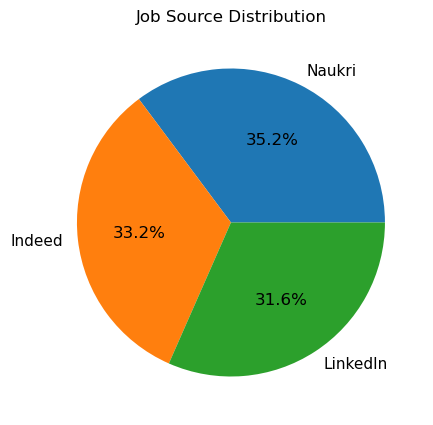

In [52]:
plt.figure(figsize=(8,5))
df['source'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Job Source Distribution")
plt.ylabel("")
plt.show()

# Posted Date Trend Analysis

In [ ]:
# Convert posted_date to datetime
df['posted_date']= pd.to_datetime(df['posted_date'])

In [53]:
# Jobs posted over time
jobs_by_date = df['posted_date'].value_counts().sort_index()
jobs_by_date

posted_date
2025-01-02    1
2025-01-03    1
2025-01-04    1
2025-01-05    1
2025-01-06    1
             ..
2026-02-20    1
2026-02-21    1
2026-02-22    1
2026-02-23    1
2026-02-24    1
Name: count, Length: 191, dtype: int64

# 📊 Line Chart

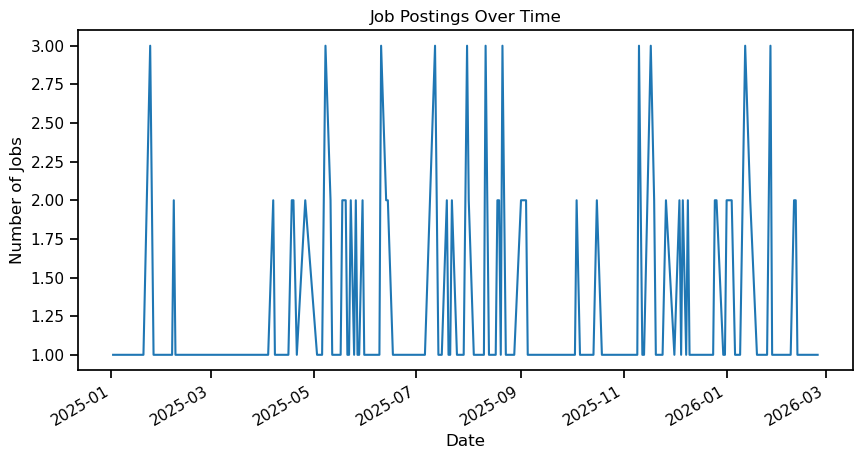

In [54]:
plt.figure(figsize=(10,5))
jobs_by_date.plot(kind='line')
plt.title("Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.show()

# Correlation Diagram

In [ ]:
# Encode experience for correlation
df['experience_encoded']= df['experience'].astype('category').cat.codes

In [55]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['experience_encoded']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

KeyError: "None of [Index(['experience_encoded'], dtype='object')] are in the [columns]"

<Figure size 500x400 with 0 Axes>

# Business Insights

In [ ]:
- Reporting Analyst and Data Analyst roles are most common.
- Pune, Bangalore, and Gurgaon have high job demand.
- Freshers and 0–1 year experience candidates have many opportunities.
- Python, SQL, Power BI, AWS, and Excel are the most required skills.
- Naukri and LinkedIn are major job sources for analyst roles.

# Conclusion

In [ ]:
This project analyzes the Data Analyst job market using Python.
By applying Pandas, NumPy, Matplotlib, and Seaborn, we extracted
meaningful insights about job roles, skills demand, experience levels,
locations, and hiring companies. This project can help freshers
understand market trends and prepare better for analyst roles.